# plotting maps from the MaNGA DAP

In [4]:
from marvin import config
config.access = 'collab'
config.mode = 'remote'
config.setRelease('MPL-8')
config.login()

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/marvin/extern/marvin_brain/python/brain/__init__.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(open(os.path.join(os.path.dirname(__file__), 'data/brain.yml')))
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/marvin/__init__.py:128: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/marvin/extern/tree/python/tree/__init__.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(ff)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/marvin/extern/sdss_access/python/sds

INFO: No release version set. Setting default to DR15


/Users/rtheria2/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rtheria2/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rtheria2/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rtheria2/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
from marvin.tools.cube import Cube

In [6]:
# read in a cube
cube = Cube(plateifu='9190-3703')
# access the header
cube.header
# get NSA data
cube.nsa

/Users/rtheria2/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


{'iauname': 'J033629.48-054351.6',
 'subdir': '03h/m04/J033629.48-054351.6',
 'ra': 54.1229134797,
 'dec': -5.73101598175,
 'isdss': 55439,
 'ined': 30716,
 'isixdf': -1,
 'ialfalfa': -1,
 'izcat': -1,
 'itwodf': -1,
 'mag': 16.9629,
 'z': 0.0221219,
 'zsrc': 'sdss   ',
 'size': 0.07,
 'run': 1729,
 'camcol': 6,
 'field': 442,
 'rerun': '301',
 'xpos': 118.073,
 'ypos': 125.628,
 'nsaid': 54972,
 'zdist': 0.0222496,
 'sersic_nmgy': [11.4057626724243,
  24.2409477233887,
  74.1988220214844,
  179.516510009766,
  254.110992431641,
  294.931304931641,
  334.414794921875],
 'sersic_nmgy_ivar': [0.0985055416822433,
  0.188214778900146,
  0.0792669728398323,
  0.0897724181413651,
  0.044765517115593,
  0.0327612087130547,
  0.00986657012254],
 'sersic_ok': 1,
 'sersic_rnmgy': [10.333812713623,
  25.0213394165039,
  73.5108642578125,
  179.48762512207,
  254.201217651367,
  295.283508300781,
  333.641937255859],
 'sersic_absmag': [-14.3207960128784,
  -15.1506004333496,
  -16.386137008667,
  

In [7]:
from marvin.tools.maps import Maps
maps = Maps(plateifu='9190-3703')
print(maps)

<Marvin Maps (plateifu='9190-3703', mode='remote', data_origin='api', bintype='HYB10', template='MILESHC-MILESHC')>


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a28127748>)

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


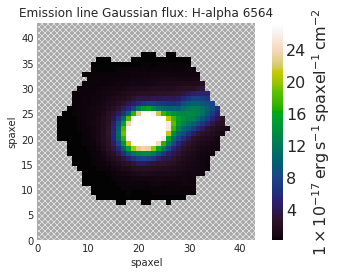

In [8]:
# get an emission line map
haflux = maps.emline_gflux_ha_6564
values = haflux.value
ivar = haflux.ivar
mask = haflux.mask
haflux.plot()

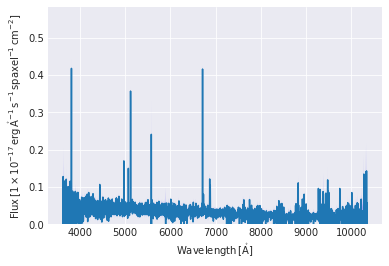

In [9]:
from marvin.tools.cube import Cube
cube = Cube(plateifu='9190-3703')
# get a spaxel by slicing cube[i,j]
spaxel=cube[15, 17]
flux = spaxel.flux
wave = flux.wavelength
ivar = flux.ivar
mask = flux.mask
flux.plot()

/Users/rtheria2/anaconda3/lib/python3.7/socket.py:660: ResourceWarning: unclosed <socket.socket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('134.181.116.85', 62898), raddr=('155.101.19.23', 443)>
  self._sock = None


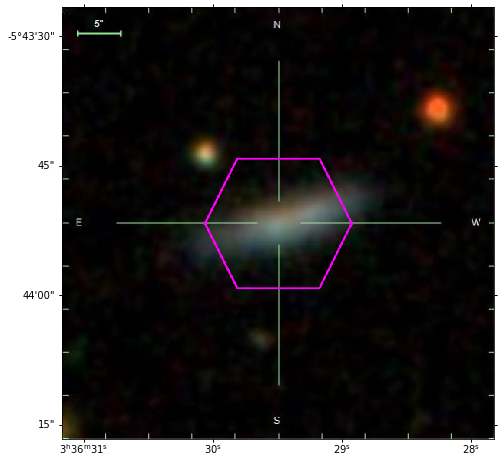

In [10]:
image = cube.getImage()
image.plot()

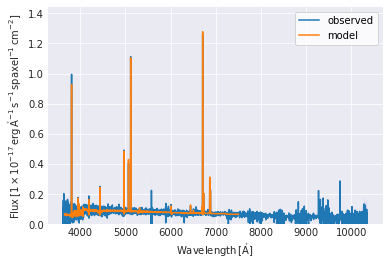

In [11]:
maps = Maps('9190-3703')

# must use Maps.getSpaxel() to get cube and modelcube
spax = maps.getSpaxel(x=17, y=17, xyorig='lower', cube=True, modelcube=True)

# mask out pixels lacking model fit
no_fit = ~spax.full_fit.masked.mask

# extra arguments to plot are passed to the matplotlib routine
ax = spax.flux.plot(label='observed')
ax.plot(spax.full_fit.wavelength[no_fit], spax.full_fit.value[no_fit], label='model')
ax.legend()

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/marvin/tools/quantities/map.py:417: RuntimeWarning: invalid value encountered in multiply
  sig_out = value**power * power * sig * value
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/marvin/tools/quantities/map.py:564: RuntimeWarning: invalid value encountered in true_divide
  sigcorr.ivar = (sigcorr.value / self.value) * self.ivar
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


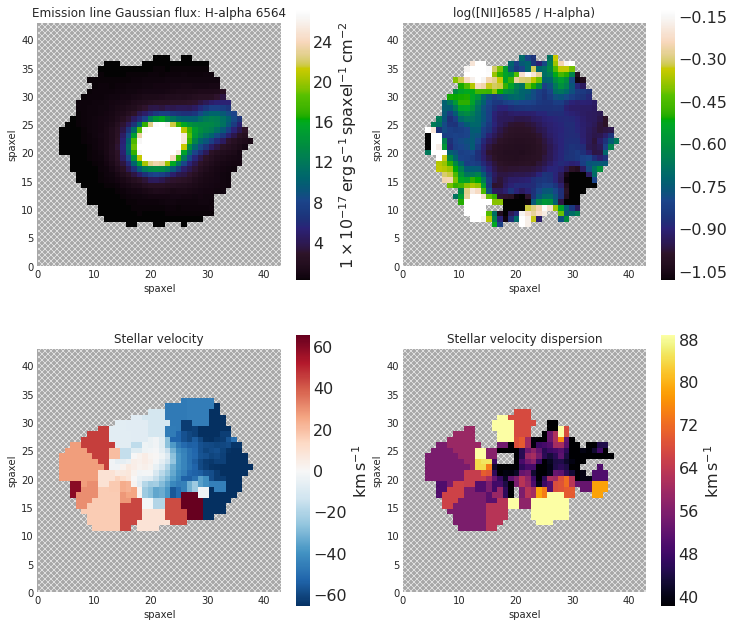

In [12]:
import matplotlib.pyplot as plt
import numpy as np
maps = Maps('9190-3703')

halpha = maps.emline_gflux_ha_6564
nii_ha = np.log10(maps.emline_gflux_nii_6585 / halpha)
stvel = maps.stellar_vel
stsig = maps.stellar_sigma
stsig_corr = stsig.inst_sigma_correction()

with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 11))
    halpha.plot(fig=fig, ax=axes[0, 0])
    nii_ha.plot(fig=fig, ax=axes[0, 1], title="log([NII]6585 / H-alpha)", snr_min=None)
    stvel.plot(fig=fig, ax=axes[1, 0])
    stsig_corr.plot(fig=fig, ax=axes[1, 1])

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/marvin/utils/plot/map.py:111: RuntimeWarning: invalid value encountered in less
  low_snr[np.abs(value * np.sqrt(ivar)) < snr_min] = True


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a6432b0>)

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


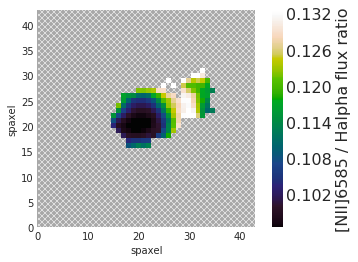

In [13]:
from marvin.tools import Maps
maps = Maps('9190-3703')
ha = maps.emline_gflux_ha_6564
nii = maps.emline_gflux_nii_6585
nii_ha = nii / ha

# Mask out non-star-forming spaxels
masks, __, __ = maps.get_bpt(show_plot=False)

# Create a bitmask for non-star-forming spaxels by taking the
# complement (`~`) of the BPT global star-forming mask (where True == star-forming)
# and set bit 30 (DONOTUSE) for those spaxels.
mask_non_sf = ~masks['sf']['global'] * ha.pixmask.labels_to_value('DONOTUSE')

# Do a bitwise OR between DAP mask and non-star-forming mask.
mask = nii_ha.mask | mask_non_sf

nii_ha.plot(mask=mask, cblabel='[NII]6585 / Halpha flux ratio')

<Marvin Maps (plateifu='9190-3703', mode='remote', data_origin='api', bintype='HYB10', template='MILESHC-MILESHC')>


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a85c208>)

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


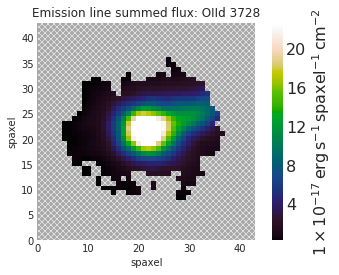

In [14]:
maps = Maps(plateifu='9190-3703')
print(maps)
# get an oiid line map, I'm not sure how correct this is
oiidflux = maps.emline_sflux_oiid_3728
values = oiidflux.value
ivar = oiidflux.ivar
mask = oiidflux.mask
oiidflux.plot()

In [15]:
help(maps)

Help on Maps in module marvin.tools.maps object:

class Maps(marvin.tools.core.MarvinToolsClass, marvin.tools.mixins.nsa.NSAMixIn, marvin.tools.mixins.dapall.DAPallMixIn, marvin.tools.mixins.aperture.GetApertureMixIn)
 |  Maps(input=None, filename=None, mangaid=None, plateifu=None, mode=None, data=None, release=None, drpall=None, download=None, nsa_source='auto', bintype=None, template=None, template_kin=None)
 |  
 |  A class that represents a DAP MAPS file.
 |  
 |  Provides access to the data stored in a DAP MAPS file. In addition to
 |  the parameters and variables defined for `~.MarvinToolsClass`, the
 |  following parameters and attributes are specific to `.Maps`.
 |  
 |  Parameters:
 |      bintype (str or None):
 |          The binning type. For MPL-4, one of the following: ``'NONE',
 |          'RADIAL', 'STON'`` (if ``None`` defaults to ``'NONE'``).
 |          For MPL-5, one of, ``'ALL', 'NRE', 'SPX', 'VOR10'``
 |          (defaults to ``'SPX'``). MPL-6 also accepts the ``'

<Marvin Maps (plateifu='9190-3703', mode='remote', data_origin='api', bintype='HYB10', template='MILESHC-MILESHC')>


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a28468898>)

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


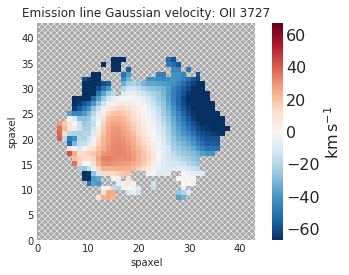

In [16]:
maps = Maps(plateifu='9190-3703')
print(maps)
# get an oii vel map, I'm not sure how correct this is. 
# I also did not put any masks as I'm unsure of how to find them, but the plot I made here looks like the one on the Marvin site

oiivel = maps.emline_gvel_oii_3727
oiivel.plot()

<Marvin Maps (plateifu='9190-3703', mode='remote', data_origin='api', bintype='HYB10', template='MILESHC-MILESHC')>


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2aa45080>)

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


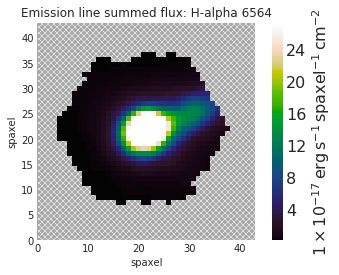

In [17]:
maps = Maps(plateifu='9190-3703')
print(maps)
# get an ha flux map, I'm not sure how to utlize the masks
haflux = maps.emline_sflux_ha_6564
haflux.plot()

<Marvin Maps (plateifu='9190-3703', mode='remote', data_origin='api', bintype='HYB10', template='MILESHC-MILESHC')>


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2aaf9dd8>)

/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/rtheria2/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


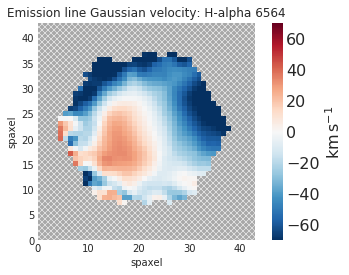

In [18]:
maps = Maps(plateifu='9190-3703')
print(maps)
# get an oiid line map, I'm not sure how correct this is
ha_vel = maps.emline_gvel_ha_6564
ha_vel.plot()